## Reading in environmental data files with Pandas

Here are examples of how to go about reading in environmental data stored in two different commonly used file formats:
- Comma Separated Values (CSV)
- Network Common Data Format (netCDF)

The below examples make use of the following Python packages:
- pandas
- matplotlib  (plotting package with Matlab syntax)
- xarray

If you do not yet have any of these packages installed, this can be accomplished through conda!

(Examples using other data formats will be posted to the main class repo)


### 1) CSV: Santa Barbara station precipitation
(example from class 10/18)

First, take the CSV-formatted file "wxstation_UCSB_NCDC.csv", here stored in the same directory as the Jupyter notebook (if you store it somewhere else, you will need to specify the absolute or relative path):

In [35]:
# Import the pandas package
import pandas as pd

# Read in data file into a Pandas data frame
dat = pd.read_csv('wxstation_UCSB_NCDC.csv') 

We can use the `type` command to make sure that this data got correctly read in as a Pandas data frame:

In [22]:
# Display type of data to confirm
type(dat)

pandas.core.frame.DataFrame

Displaying the header information using `.head()` is a good way to get a feeling for what type of data is stored in the data frame:

In [23]:
# Display header information for data frame
dat.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USW00053152,"SANTA BARBARA 11 W, CA US",8/14/08,0.0,NaN,NaN
1,USW00053152,"SANTA BARBARA 11 W, CA US",8/15/08,0.0,73.0,62.0
2,USW00053152,"SANTA BARBARA 11 W, CA US",8/16/08,0.0,71.0,61.0
3,USW00053152,"SANTA BARBARA 11 W, CA US",8/17/08,0.0,71.0,60.0
4,USW00053152,"SANTA BARBARA 11 W, CA US",8/18/08,0.0,71.0,59.0


Now we can use the same commands from the homework assignment and related examples, from Matplotlib, to generate a time series plot of rainfall:

(0.0, 6.0)

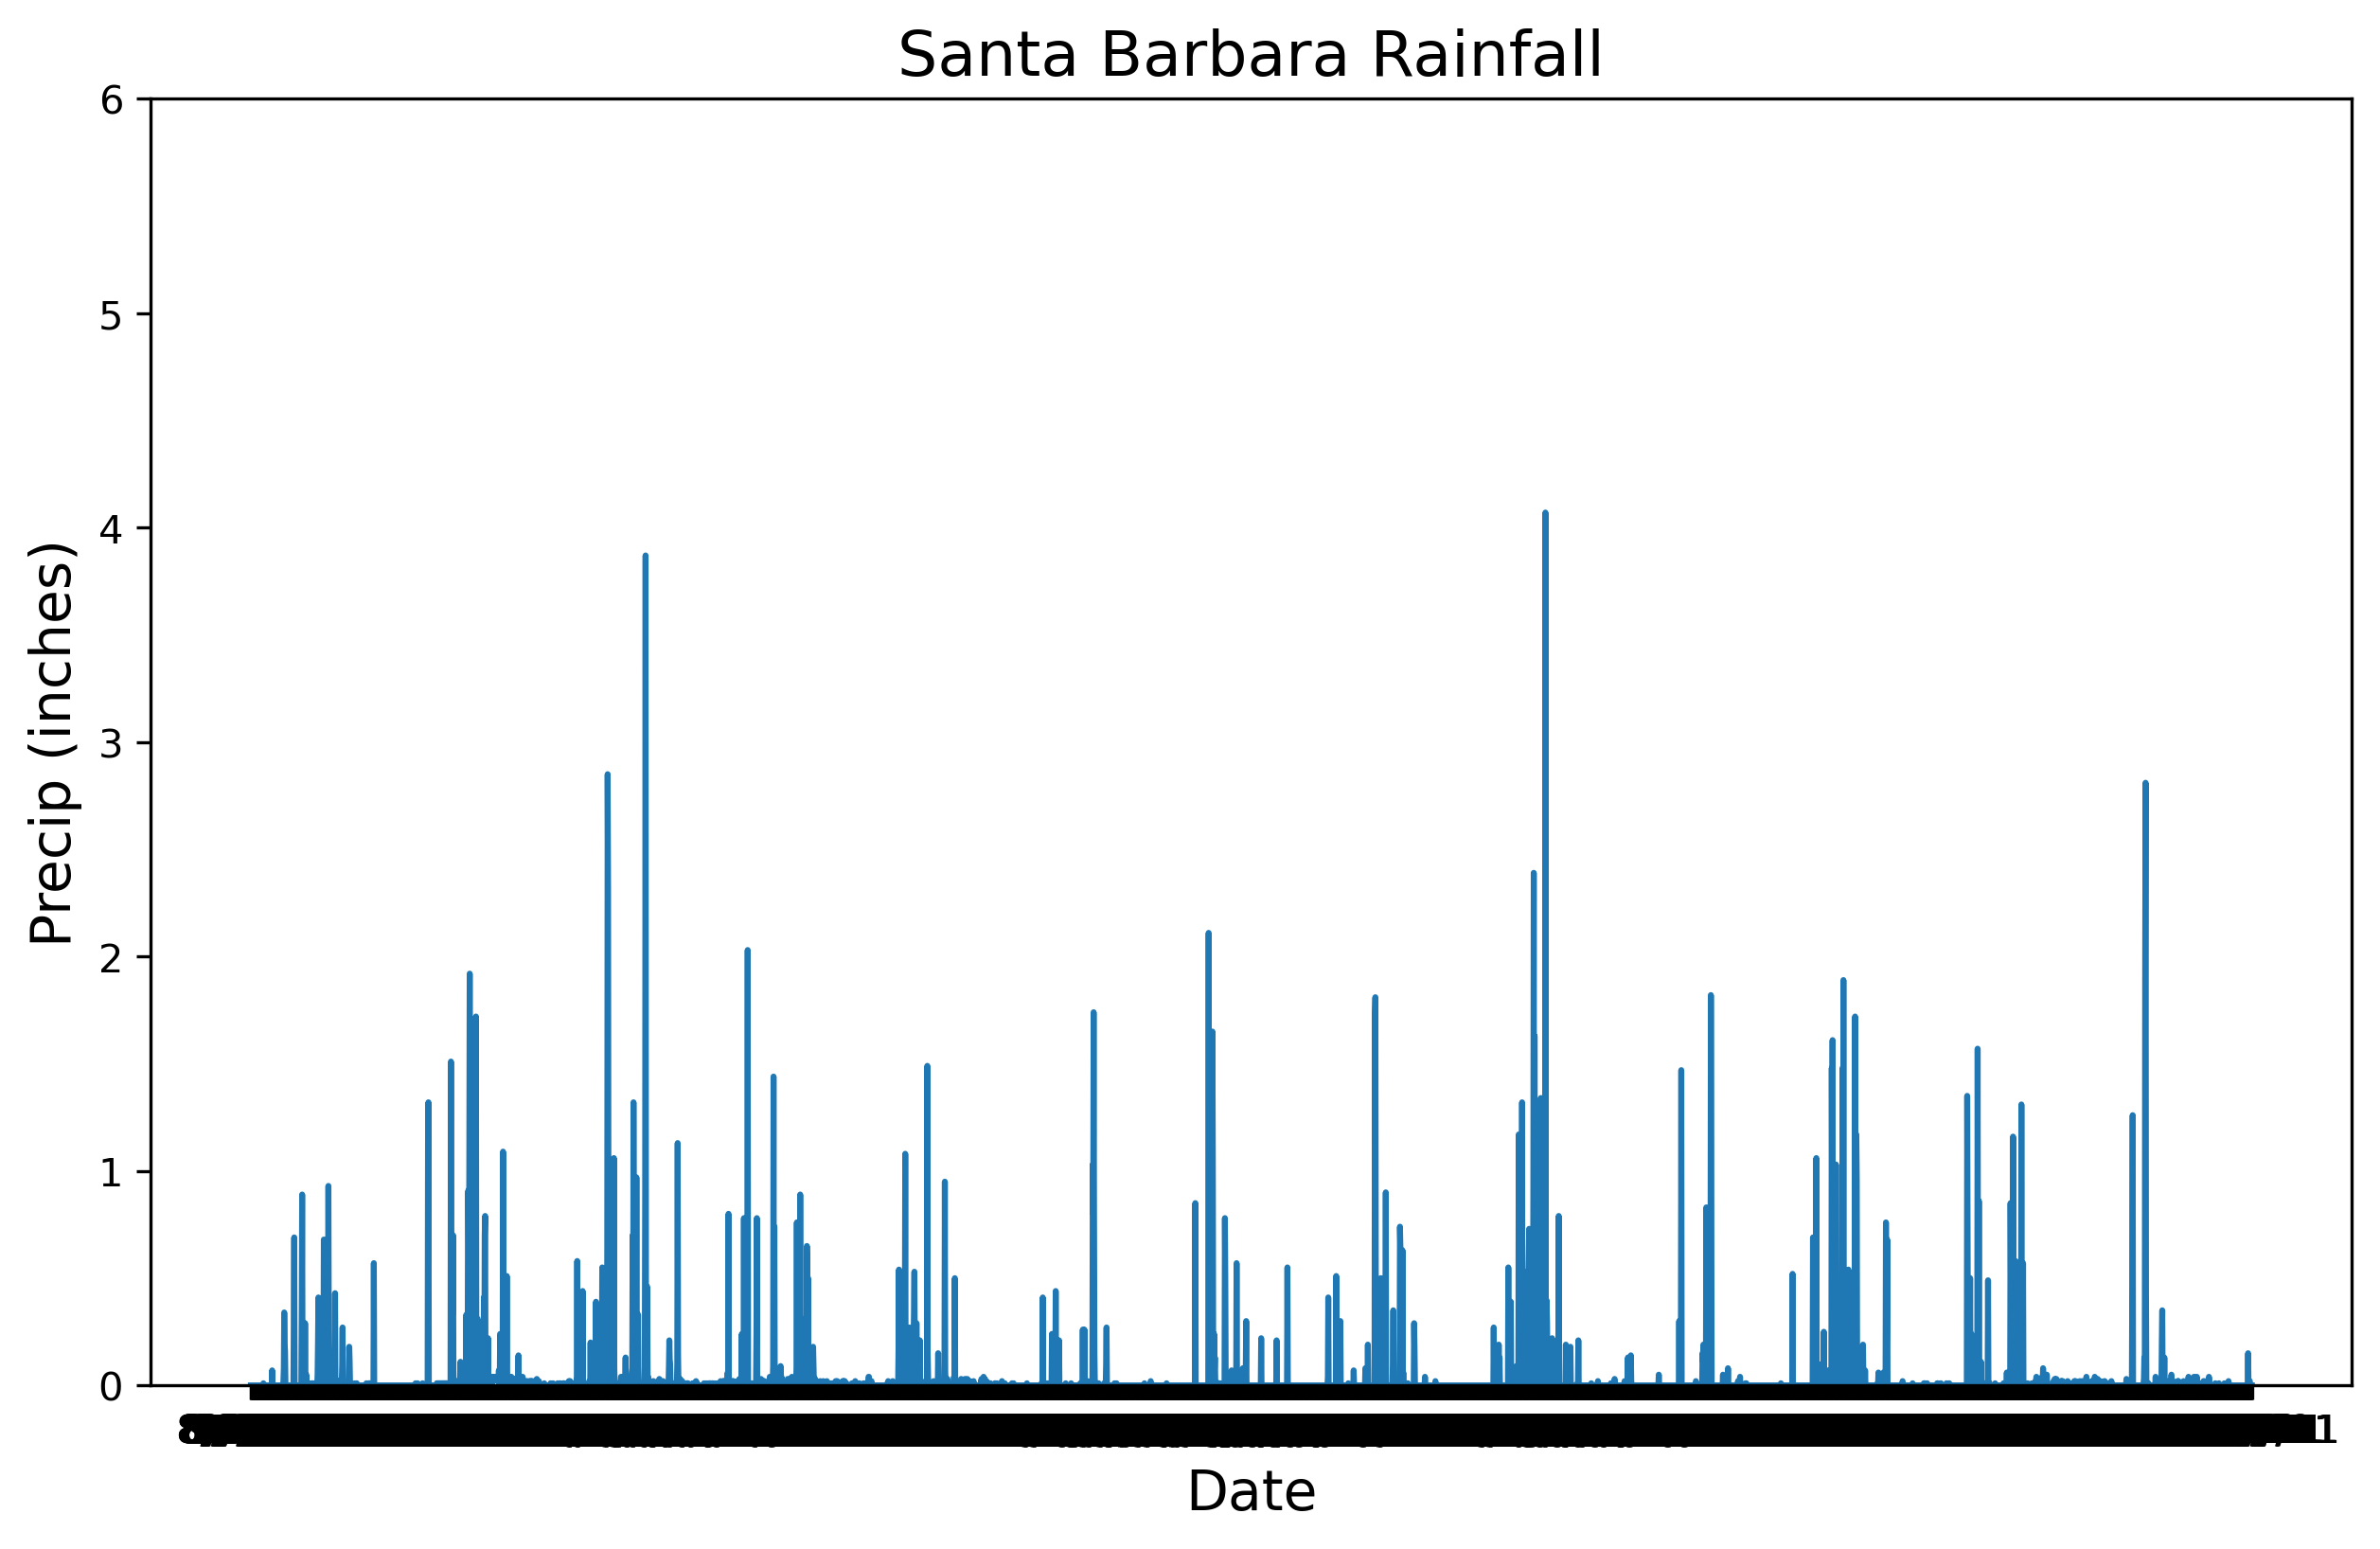

In [33]:
# Make a basic time series plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.plot(dat['DATE'],dat['PRCP'])   # add data to the plot
plt.title('Santa Barbara Rainfall', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precip (inches)', fontsize=14)
plt.ylim(0, 6)


### 2) netCDF: Tropical Atmosphere/Ocean buoy
(example from class 10/20)

As our second example, let's look at a netCDF-formatted dataset. We'll stick to smaller (single-location) data for now: the TAO buoy array has a convenient interface for data display and delivery.

*note: the filenames used by TAO end in `.cdf`. This and `.nc` are the two suffixes generally associated with netCDF information*

Here I have downloaded temperature information from the buoy at 2S, 155W and stored it in the same directory as this notebook:

In [108]:
import xarray as xr
import numpy as np

In [111]:
obs_tao=xr.open_dataset('sst0n155w_5day.cdf')

Let's view the contents of this data (stored as an `xarray.Dataset` object now) in two different ways: using the `.head()` syntax and the `print()` command.

In [112]:
obs_tao.head()

<xarray.Dataset>
Dimensions:  (time: 5, depth: 1, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 1991-07-24T12:00:00 ... 1991-08-13T12:00:00
  * depth    (depth) float32 1.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 205.0
Data variables:
    T_25     (time, depth, lat, lon) float32 ...
    QT_5025  (time, depth, lat, lon) float32 ...
Attributes:
    platform_code:                0n155w
    site_code:                    0n155w
    wmo_platform_code:            51023
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                08:45 20-OCT-2021

In [113]:
print(obs_tao)

<xarray.Dataset>
Dimensions:  (time: 2208, depth: 1, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 1991-07-24T12:00:00 ... 2021-10-17T12:00:00
  * depth    (depth) float32 1.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 205.0
Data variables:
    T_25     (time, depth, lat, lon) float32 ...
    QT_5025  (time, depth, lat, lon) float32 ...
Attributes:
    platform_code:                0n155w
    site_code:                    0n155w
    wmo_platform_code:            51023
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                08:45 20-OCT-2021


In [115]:
sst=obs_tao['T_25']

In [116]:
print(sst)

<xarray.DataArray 'T_25' (time: 2208, depth: 1, lat: 1, lon: 1)>
array([[[[28.084   ]]],


       ...,


       [[[26.542166]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1991-07-24T12:00:00 ... 2021-10-17T12:00:00
  * depth    (depth) float32 1.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 205.0
Attributes:
    name:            T
    long_name:       SST (C)
    generic_name:    temp
    FORTRAN_format:   
    units:           C
    epic_code:       25


#### Make a time series
As in the last example, let's make a time series plot to look at the data. 

*If you play around with plotting different parts of this file, you'll notice: a lot of the data are missing! This is fairly typical with 'real world' data, where nothing is ever perfect.*

Take a look at the depth values available in this file: what are they?

In [117]:
print(obs_tao['time'])

<xarray.DataArray 'time' (time: 2208)>
array(['1991-07-24T12:00:00.000000000', '1991-07-29T12:00:00.000000000',
       '1991-08-03T12:00:00.000000000', ..., '2021-10-07T12:00:00.000000000',
       '2021-10-12T12:00:00.000000000', '2021-10-17T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1991-07-24T12:00:00 ... 2021-10-17T12:00:00
Attributes:
    FORTRAN_format:  
    type:            UNEVEN
    point_spacing:   uneven


(7670.0, 18931.0)

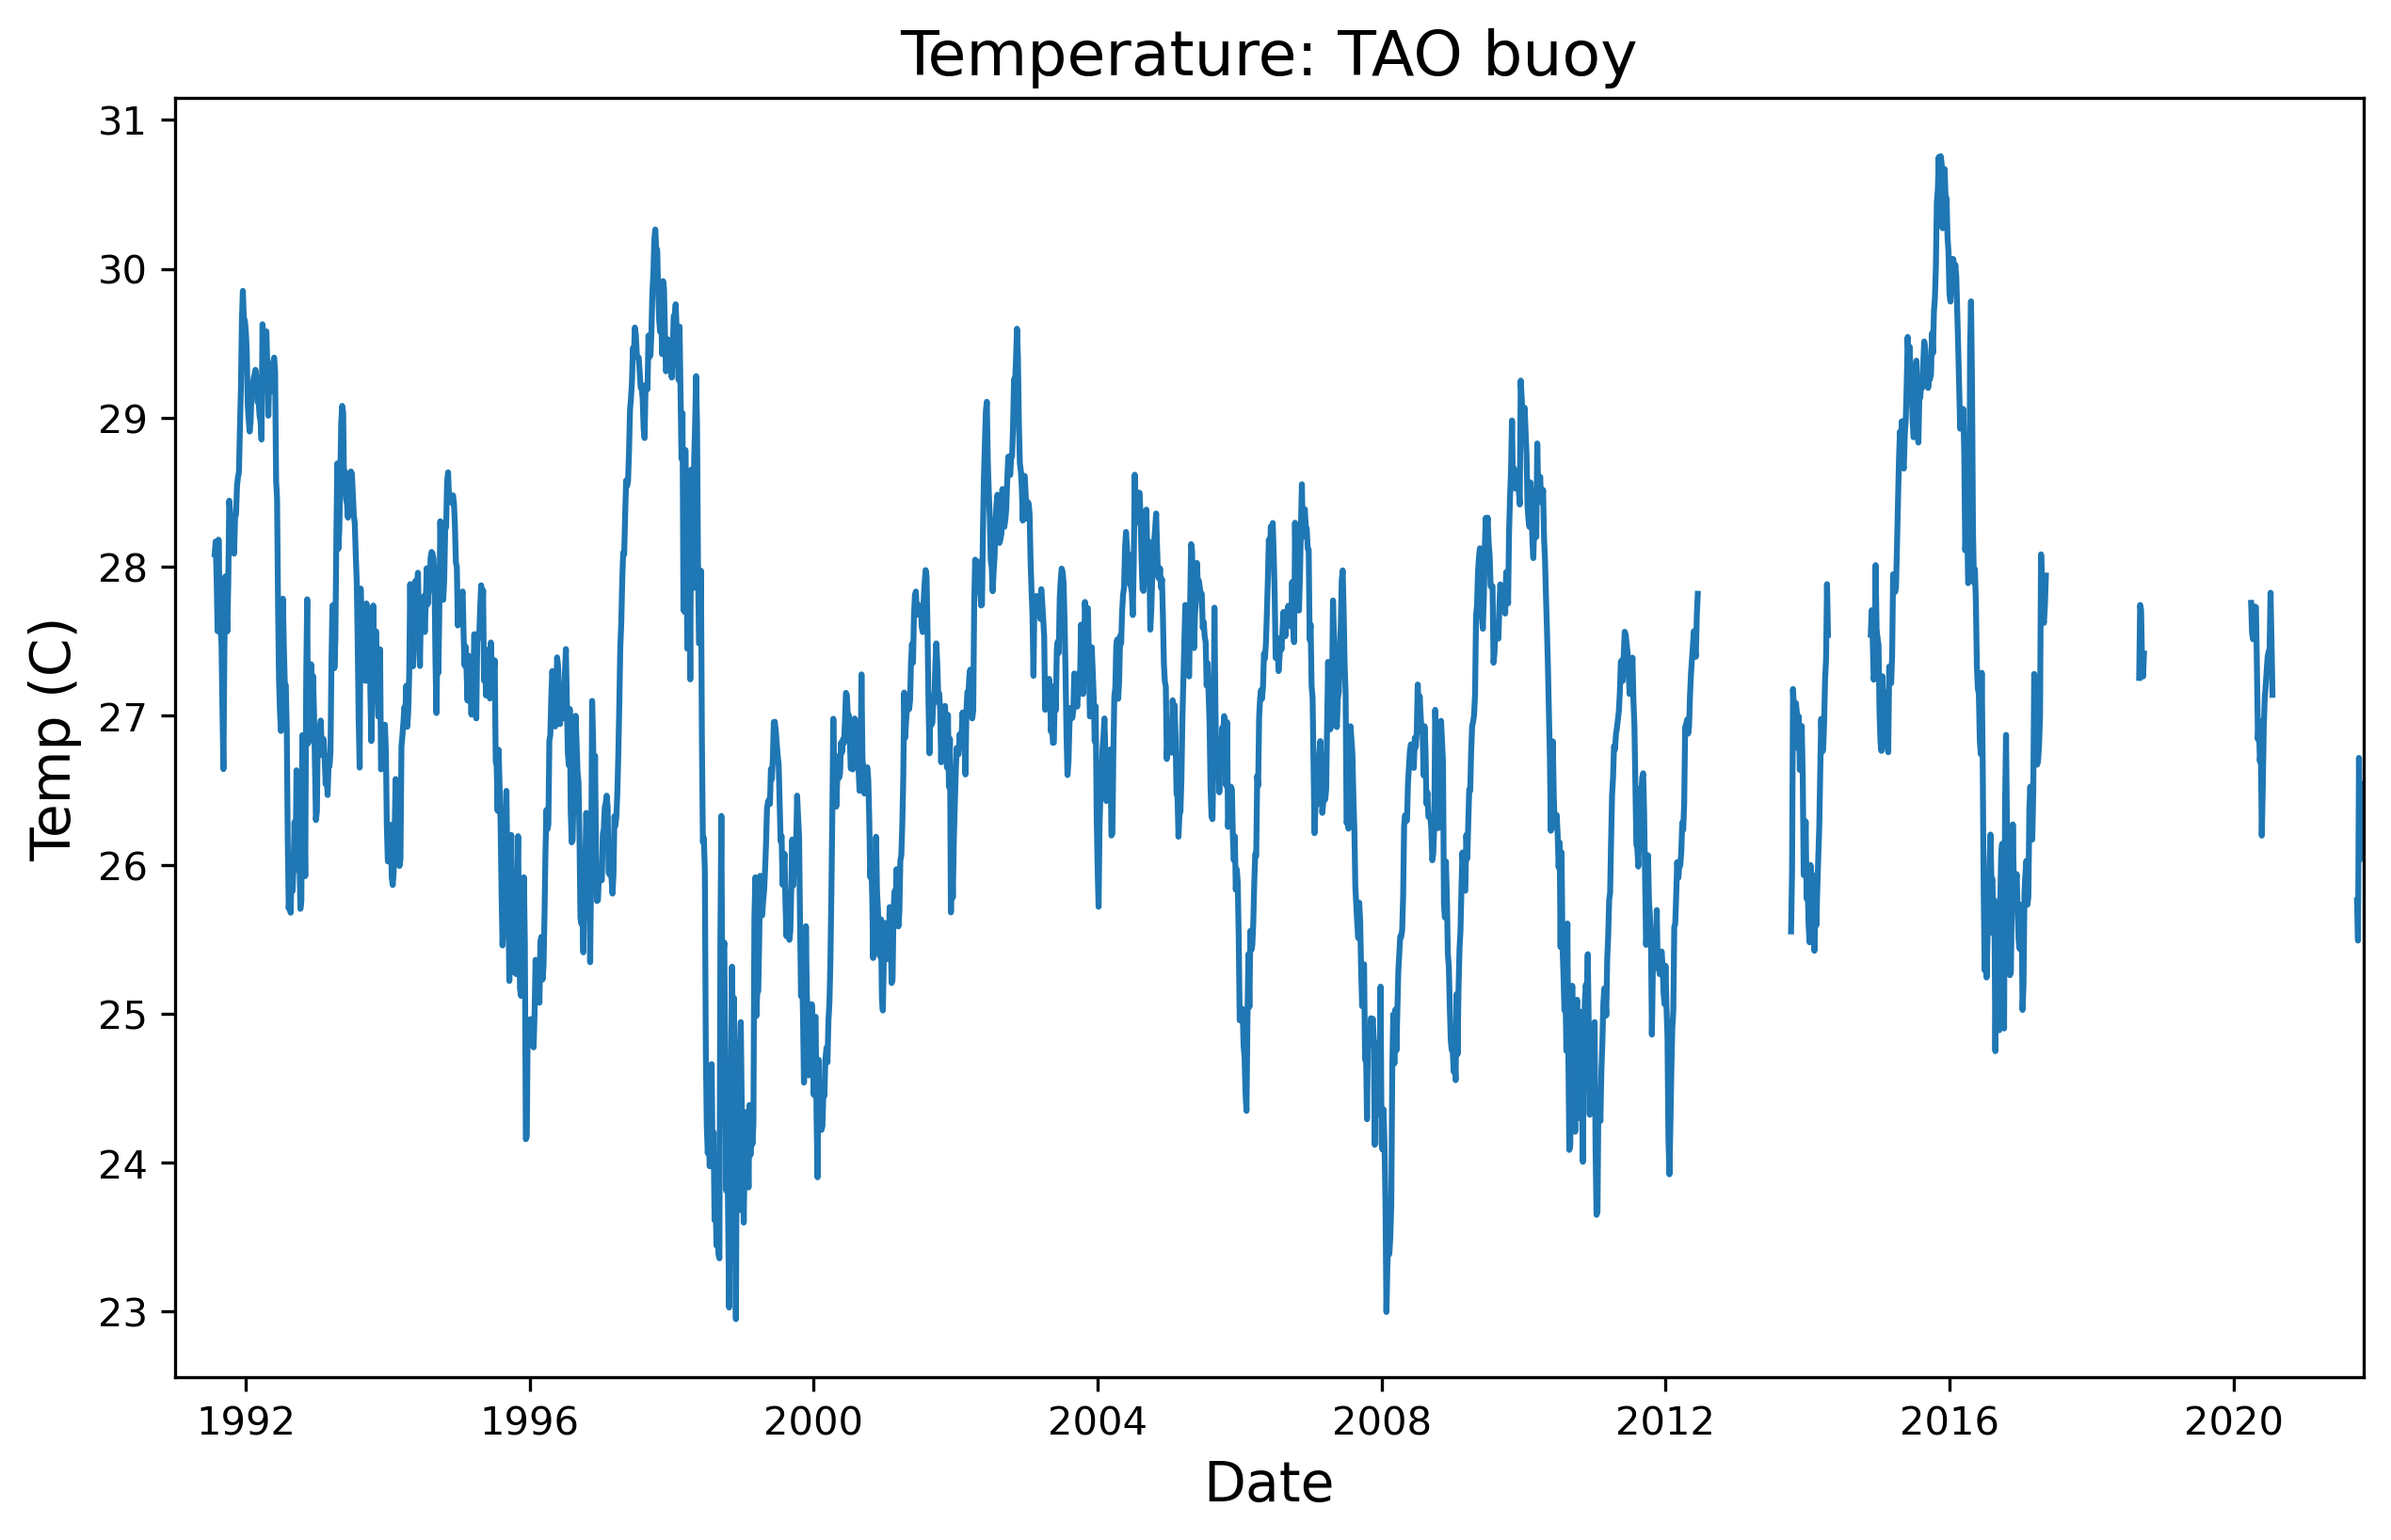

In [124]:
plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
#plt.plot(obs_tao['time'],sst)   # add data to the plot
plt.plot(obs_tao['time'],sst.squeeze())
plt.title('Temperature: TAO buoy', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temp (C)', fontsize=14)

plt.xlim([np.datetime64('1991-01-01'), np.datetime64('2021-10-31')])
#plt.xlim()
#plt.ylim(0, 6)